In [118]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

In [119]:
#import data
df = pd.read_csv('problem2.csv')
x = df['x'].values
y = df['y'].values
mean_x = np.mean(x)
mean_y = np.mean(y)
print(len(x))

100


In [120]:
def normalitylikelihood(theta_hat, x, y):
    sigma = 1
    # Compute Gaussian likelihood
    pdf = 1 / np.sqrt(2 * np.pi * sigma**2) * np.exp(-(y - theta_hat * x)**2 / (2 * sigma**2))
    return pdf

def tlikelihood(theta_hat, x, y):
    #dfr is the degree of freedom
    dfr = 99
    loc = 0
    scale = 1
    # Compute studen-t likelihood
    pdf = stats.t.pdf(y - theta_hat * x, dfr, loc, scale)
    return pdf

In [121]:
print(normalitylikelihood(1.0,x[2],y[2]))
print(tlikelihood(1.0,x[2],y[2]))

0.1907837028531234
0.1899311152676052


In [122]:
theta_hat_mle = (x @ y) / (x @ x)

In [123]:
def Lfunction(theta_hat, x, y, distribution):
    if distribution == 'normality':
        L = 0
        for i in range(0,100):
            L += np.log(normalitylikelihood(theta_hat,x[i],y[i]))
        return L
    elif distribution == 't':
        L = 0
        for i in range(0,100):
            L += np.log(tlikelihood(theta_hat,x[i],y[i]))
        return L

In [124]:
print(Lfunction(1.0, x, y, 'normality'))
print(Lfunction(1.0, x, y, 't'))

-171.80479706329518
-170.05411966549306


In [125]:
theta = np.linspace(0,2,200000)
Lnor = Lfunction(theta, x, y, 'normality')
Lt = Lfunction(theta, x, y, 't')

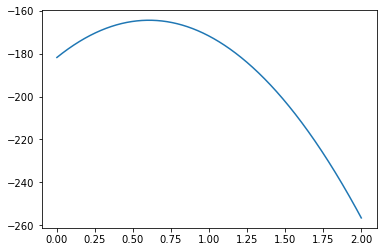

In [126]:
plt.plot(theta, Lnor)

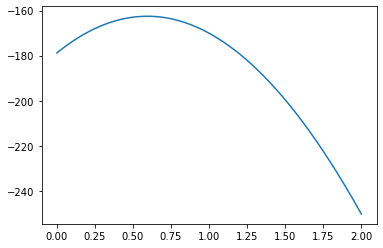

In [127]:
plt.plot(theta, Lt)

In [128]:
theta_hat_mle_normality = Lnor.argmax() * 2 / 200000
theta_hat_mle_t = Lt.argmax() * 2 / 200000

In [129]:
m = theta_hat_mle_normality
c = mean_y - m * mean_x
print("the slope estimated by mle(normality) is %.6f " % m)
print("the intercept estimated by mle(normality) is %.6f " % c)

the slope estimated by mle(normality) is 0.605190 
the intercept estimated by mle(normality) is 0.119836 


In [130]:
m2 = theta_hat_mle_t
c2 = mean_y - m2 * mean_x
print("the slope estimated by mle(t) is %.6f " % m2)
print("the intercept estimated by mle(t) is %.6f " % c2)

the slope estimated by mle(t) is 0.594180 
the intercept estimated by mle(t) is 0.119835 
